# Using Transfer Learning 

In [1]:
# import the libraries required for our task

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
train_path = '/content/drive/MyDrive/Malaria-Detection-master/Dataset/Train'
valid_path = '/content/drive/MyDrive/Malaria-Detection-master/Dataset/Test'


### We are going to use functional api for transfer learning

In [4]:
# Importing the Vgg 16 library 
Vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
# don't train existing weights cuz we are using transfer learning
for layer in Vgg19.layers:
    layer.trainable = False

In [6]:
# flattening the output that we got from vgg19
x = Flatten()(Vgg19.output)

In [7]:
# adding output layer
prediction = Dense(2, activation='softmax')(x)

# creating our model
model = Model(inputs=Vgg19.input, outputs=prediction)

In [8]:

# structure of the model
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [9]:
#  metric, loss and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


### we are using image data generator to provide augmentations to our input, so that our model performs better

In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Malaria-Detection-master/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [12]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Malaria-Detection-master/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


## Since malaria dataset is large and I do not have GPU so I took part of dataset

In [13]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
13/13 [==============================] - 24s 871ms/step - loss: 1.5453 - accuracy: 0.5240 - val_loss: 1.8182 - val_accuracy: 0.3209
Epoch 2/20
13/13 [==============================] - 8s 646ms/step - loss: 0.7013 - accuracy: 0.6418 - val_loss: 0.5311 - val_accuracy: 0.7090
Epoch 3/20
13/13 [==============================] - 8s 629ms/step - loss: 0.4461 - accuracy: 0.7837 - val_loss: 0.7691 - val_accuracy: 0.5970
Epoch 4/20
13/13 [==============================] - 8s 629ms/step - loss: 0.4153 - accuracy: 0.7981 - val_loss: 0.4290 - val_accuracy: 0.7836
Epoch 5/20
13/13 [==============================] - 8s 630ms/step - loss: 0.4182 - accuracy: 0.7885 - val_loss: 0.3812 - val_accuracy: 0.8134
Epoch 6/20
13/13 [==============================] - 8s 625ms/step - loss: 0.3673 - accuracy: 0.8221 - val_loss: 0.5805 - val_accuracy: 0.6791
Epoch 7/20
13/13 [==============================] - 8s 629ms/step - loss: 0.2903 - accuracy: 0.8846 - val_loss: 0.3180 - val_accuracy: 0.8507
Epoch

### plot of train vs val

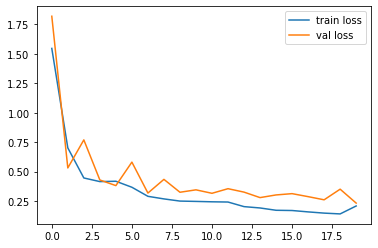

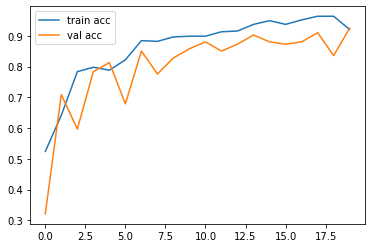

<Figure size 432x288 with 0 Axes>

In [14]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('model_vgg19.h5')

In [16]:
# predicting using model
y_pred = model.predict(test_set)


In [17]:
y_pred

array([[9.96939778e-01, 3.06023518e-03],
       [9.43338871e-01, 5.66610880e-02],
       [3.07674676e-01, 6.92325294e-01],
       [9.98478353e-01, 1.52163743e-03],
       [1.55649111e-01, 8.44350874e-01],
       [7.31467962e-01, 2.68532038e-01],
       [9.96987641e-01, 3.01242783e-03],
       [9.09280658e-01, 9.07193646e-02],
       [7.58966923e-01, 2.41033047e-01],
       [8.89679730e-01, 1.10320278e-01],
       [1.40393302e-01, 8.59606743e-01],
       [1.69744104e-01, 8.30255866e-01],
       [9.98016596e-01, 1.98336807e-03],
       [2.62312233e-01, 7.37687767e-01],
       [9.93849993e-01, 6.15003332e-03],
       [9.55270648e-01, 4.47293967e-02],
       [1.56661525e-01, 8.43338490e-01],
       [7.14034975e-01, 2.85965025e-01],
       [2.02106729e-01, 7.97893286e-01],
       [9.43266869e-01, 5.67331873e-02],
       [9.99771655e-01, 2.28345947e-04],
       [9.81482446e-01, 1.85174774e-02],
       [4.07139033e-01, 5.92860997e-01],
       [8.44897568e-01, 1.55102372e-01],
       [8.103846

In [18]:

import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1])

## Loading image from drive to predict its result

In [19]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('model_vgg19.h5')

In [20]:
img=image.load_img('/content/drive/MyDrive/Malaria-Detection-master/Dataset/Test/Uninfected/2.png',target_size=(224,224))



In [21]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [22]:
x.shape

(224, 224, 3)

In [23]:
x=x/255
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [24]:
model.predict(img_data)

array([[0.01303748, 0.9869625 ]], dtype=float32)

In [25]:
a=np.argmax(model.predict(img_data), axis=1)

In [26]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected


# Using basic CNN architecture-model 2

In [28]:
### Create Model from scratch using CNN
from tensorflow.keras.layers import MaxPooling2D
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 50176)            

In [29]:
# metric, loss and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [30]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [31]:
# same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Malaria-Detection-master/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [32]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Malaria-Detection-master/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [34]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
13/13 [==============================] - 7s 500ms/step - loss: 0.6674 - accuracy: 0.5529 - val_loss: 0.6794 - val_accuracy: 0.6791
Epoch 2/20
13/13 [==============================] - 7s 507ms/step - loss: 0.6145 - accuracy: 0.6250 - val_loss: 0.7496 - val_accuracy: 0.3955
Epoch 3/20
13/13 [==============================] - 7s 503ms/step - loss: 0.5361 - accuracy: 0.7260 - val_loss: 0.8489 - val_accuracy: 0.4328
Epoch 4/20
13/13 [==============================] - 6s 493ms/step - loss: 0.4684 - accuracy: 0.7620 - val_loss: 0.9800 - val_accuracy: 0.4179
Epoch 5/20
13/13 [==============================] - 6s 494ms/step - loss: 0.3604 - accuracy: 0.8317 - val_loss: 0.9423 - val_accuracy: 0.4851
Epoch 6/20
13/13 [==============================] - 6s 497ms/step - loss: 0.3316 - accuracy: 0.8365 - val_loss: 0.6900 - val_accuracy: 0.6119
Epoch 7/20
13/13 [==============================] - 6s 492ms/step - loss: 0.3251 - accuracy: 0.8654 - val_loss: 0.4884 - val_accuracy: 0.7612
Epoch 

# plot of train vs val

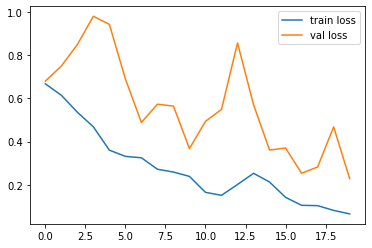

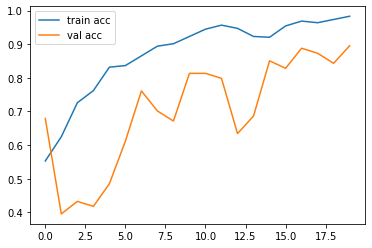

<Figure size 432x288 with 0 Axes>

In [35]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# Approach for model 1

# Approach for model 2

## Comparision between both models

### I have no experience of deployment of models, so I tried deploying it using Flask 